# Clasificación de número con el dataset MNIST usanado redes convolucionales

En este cuadreno vamos a implementar una convolucional para clasificar imágenes de cifras. Para entrenar el modelo usaremos el dataset MNIST (https://www.tensorflow.org/datasets/catalog/mnist?hl=es).

## 1. Importamos librerías

---



In [21]:
import tensorflow as tf
import keras
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import random

## 2. Preprocesado de datos

---



El primer paso es preprocesar los datos. Para ello, cargamos el conjunto de datos de dígitos MNIST de la biblioteca de conjuntos de datos Keras, lo dividimos en conjuntos de entrenamiento y de prueba, hacemos un reshape de las imágenes y codificamos las etiquetas.

In [2]:
# Cargamos el dataset MNIST.
# El dataset MNIST tiene 60,000 imágenes de entrenamiento y 10,000 imagenes de test de dígitos escritos a mano.
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Normalizamos los valores de píxeles al intervalo [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertimos las etiquetas a formato one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)  # 10 clases (0-9)
y_test = keras.utils.to_categorical(y_test, 10)

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST digit.

In [4]:
# Show the shapes of the data.
print("Imágenes de entrenamiento:", X_train.shape)
print("Imágenes de test:", X_test.shape)
print("Etiquetas de entrenamiento:", y_train.shape)
print("Etiquetas de test:", y_test.shape)

Imágenes de entrenamiento: (60000, 28, 28)
Imágenes de test: (10000, 28, 28)
Etiquetas de entrenamiento: (60000, 10)
Etiquetas de test: (10000, 10)


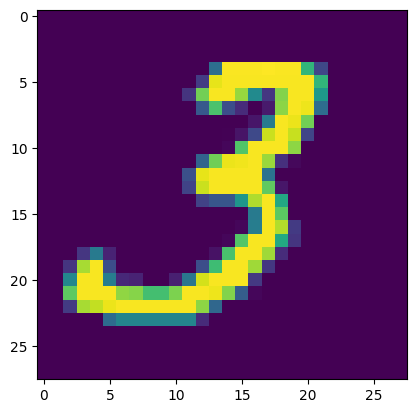

In [5]:
# Show a sample MNIST digit.
index = random.randint(1, 60000)
plt.imshow(X_train[index])
plt.show()

## 3. Red neuronal
---



### 3.1. Definimos el modelo

Vamos de definir un modelo secuencial de dos capas fully connected (dense layers)

In [6]:
num_classes = 10
input_shape = (28, 28,1)

# Define el modelo
model = Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)


2025-07-29 10:01:59.038750: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
# Mostramos información del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Una vez definido el modelo lo compilamos usando el optimizador Adam and y como función de pérdida (loss) categorrical cross-entropy.




In [8]:
# Compilamos the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 3.2. Entrenamos el modelo

Para entrenar el modelo debemos definie el número de épocas (epochs) y y tamaño de batch.


In [9]:
# Define the parameters.
num_epochs = 10
batch_size = 32

# Train the model.
history = model.fit(X_train,
                      y_train,
                      epochs=num_epochs,
                      batch_size=batch_size,
                      validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8663 - loss: 0.4346 - val_accuracy: 0.9803 - val_loss: 0.0626
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9719 - loss: 0.0918 - val_accuracy: 0.9861 - val_loss: 0.0427
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9808 - loss: 0.0626 - val_accuracy: 0.9882 - val_loss: 0.0350
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9832 - loss: 0.0532 - val_accuracy: 0.9891 - val_loss: 0.0303
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9849 - loss: 0.0462 - val_accuracy: 0.9897 - val_loss: 0.0312
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9904 - val_loss: 0.0283
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9859 - loss: 0.0409 - val_accuracy: 0.9912 - val_loss: 0.0267
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9897 - loss: 0

### 3.3. Mostramos las métricas

Mostramos la precisióh del modelo (accuracy) usando el conjunto de datos de test.


In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0315
Test Accuracy: 0.9911999702453613
Test Loss: 0.026002630591392517


Guardamos las métricas para cada época y dibujamos la pérdida y la precicion de del modelo.

In [11]:
# Guardamos las métricas.
metrics = history.history

Pintamos las curvas de precisión y pérdida.

In [12]:
# Guardamos los valores de la pérdida
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

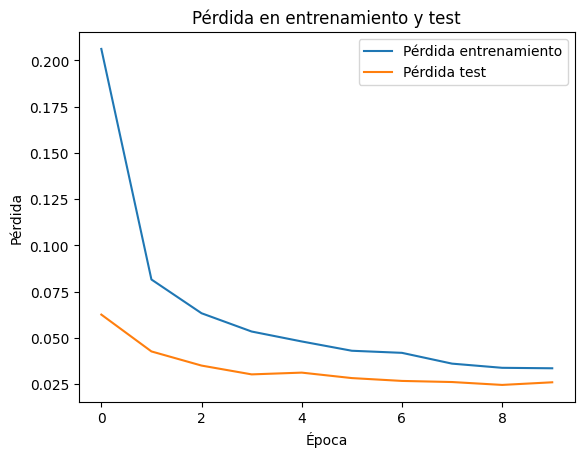

In [13]:
# Pintamos los valores
x = np.arange(0, num_epochs, 1)
plt.title('Pérdida en entrenamiento y test')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.plot(x, training_loss_list, label='Pérdida entrenamiento')
plt.plot(x, test_loss_list, label='Pérdida test')
plt.legend()
plt.show()

In [14]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

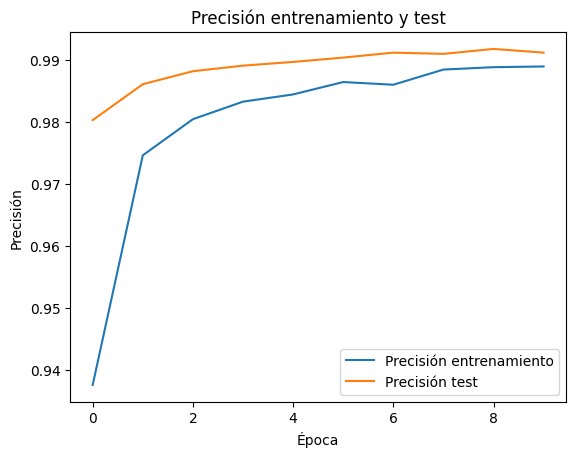

In [15]:
plt.title('Precisión entrenamiento y test')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.plot(x, train_accuracy_list, label='Precisión entrenamiento')
plt.plot(x, test_accuracy_list, label='Precisión test')
plt.legend()
plt.show()

## 4. Probamos el modelo haciendo inferencia

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [16]:
# Hacemos una predicción usando el modelo que hemos entrenado.
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Elegimos una imagen aleatoria y su etiqueta para ver si la predicción es correcta.

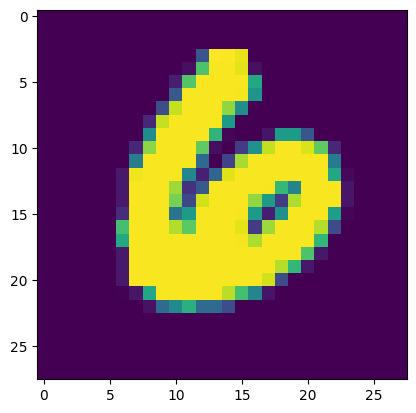

In [17]:
# Seeleccionamos una imagen del conjunto de test de forma aletoria
index = random.randint(1, 10000)

# Mostramos la imagen
plt.imshow(X_test[index])
plt.show()

In [18]:
print("Predicción:", np.argmax(predictions[index]))

Predicción: 6


## 6. Guardamos el modelo

---

Aqui guardamos el modelo que se ejecutará en el exe:


In [19]:
model.save("ClassificacionDigitos.keras")  # Nuevo formato recomendado